In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset_v1 = pd.read_csv('Telecom_customer_churn.csv')
dataset_v1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
dataset_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
dataset_v1.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
(dataset_v1['TotalCharges'] == " ").sum()

11

There seems to be 11 empty records in "TotalCharges" variable. Hence, we need to replace this records with NaNs

In [13]:
dataset_v1['TotalCharges'] = dataset_v1['TotalCharges'].replace(" ", np.nan)
dataset_v1.dropna(inplace = True)
dataset_v1.shape

(7032, 21)

In [14]:
# Converting the object type to float type for "Total Charges" variable

dataset_v1['TotalCharges'] = dataset_v1['TotalCharges'].astype(float)

In [15]:
## Check for different categories in the features

category_col = dataset_v1.select_dtypes(include = object).columns.tolist()
for col in category_col :
    print(f"----------------------------{col.title()}-------------------------------------")
    print(dataset_v1[col].value_counts(), '\n')

----------------------------Customerid-------------------------------------
0771-WLCLA    1
4628-CTTLA    1
7570-WELNY    1
7718-UPSKJ    1
7776-QGYJC    1
             ..
8393-JMVMB    1
5204-QZXPU    1
6563-VRERX    1
6854-EXGSF    1
1163-ONYEY    1
Name: customerID, Length: 7032, dtype: int64 

----------------------------Gender-------------------------------------
Male      3549
Female    3483
Name: gender, dtype: int64 

----------------------------Partner-------------------------------------
No     3639
Yes    3393
Name: Partner, dtype: int64 

----------------------------Dependents-------------------------------------
No     4933
Yes    2099
Name: Dependents, dtype: int64 

----------------------------Phoneservice-------------------------------------
Yes    6352
No      680
Name: PhoneService, dtype: int64 

----------------------------Multiplelines-------------------------------------
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines

From the above sub-categories, we can observe, there is sub-categories called "No Internet Service" in six variables. Hence, we can replace it with "No"

In [18]:
category_rep = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies']

for i in category_rep : 
    dataset_v1[i]  = dataset_v1[i].replace({'No internet service' : 'No'})

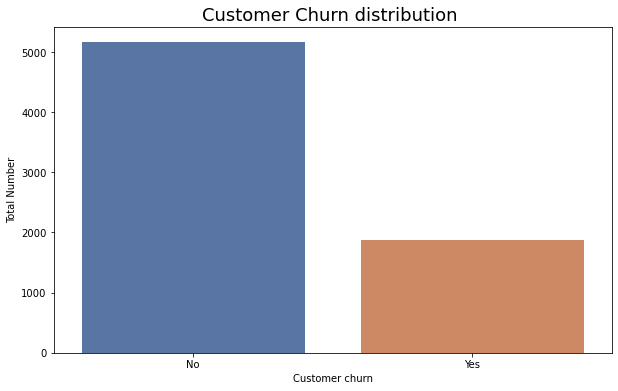

In [21]:
# Understanding Churn variable

plt.figure(figsize=(10,6))

sns.countplot(x = dataset_v1.Churn, palette='deep')
plt.xlabel('Customer churn', fontsize= 10)
plt.ylabel('Total Number', fontsize= 10)
plt.title("Customer Churn distribution ",fontsize= 18)
plt.show()

In [22]:
#using one hot encoding to encode categorical variables

dataset_v2 = dataset_v1.copy()

X = dataset_v2.drop(columns = ['customerID'])  # Since, customerID is just an label variable, we can drop it
y = X['Churn']

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder = LabelEncoder()
y = pd.Series(labelencoder.fit_transform(y))

object_cols = list(dataset_v2.select_dtypes(include=['object']).columns)
object_cols.remove('customerID')
object_cols

dummy_cols = object_cols.copy()
dummy_cols.remove('Churn')

X =  pd.get_dummies(X, columns = dummy_cols).drop(columns = ['Churn'])

In [23]:
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [25]:
y.head()

0    0
1    0
2    1
3    0
4    1
dtype: int32

In [24]:
# Splitting the dataset into training and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 100, stratify = y, shuffle = True)